In [35]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [36]:
#Reading and Exploring the data
data = pd.read_csv("Mall_Customers.csv")

In [37]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [38]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [39]:
data.duplicated().sum()

np.int64(0)

In [40]:
data.drop_duplicates(inplace=True)

In [41]:
# Encoding the Gender Column
data.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [43]:
# machine learning process

In [44]:
X = data.values


In [45]:
#Finding k value for kMeans Clustering
wcss = []
for k in range(1,9):
  kmeans = KMeans(n_clusters = k, init = 'k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [46]:
wcss

[975512.06,
 387065.7137713772,
 271396.5629660314,
 195401.19855991477,
 157951.7139277961,
 146977.04496235898,
 113247.39086437957,
 86026.5343045842]

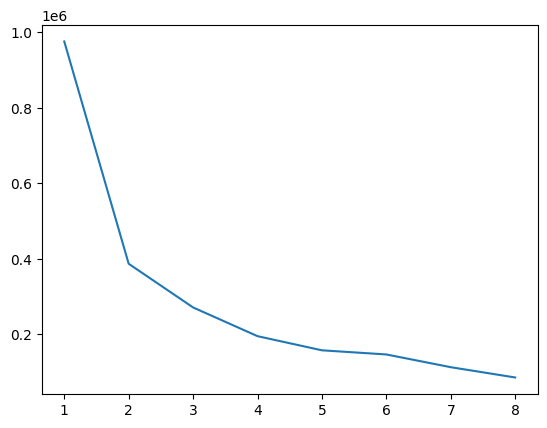

In [47]:
#plot the elbow point graph
plt.plot(range(1,9), wcss)
plt.show()

In [50]:
#Apply KMeans Clustering on the data
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
kmeans.fit(X)

KMeans(n_clusters=2)

In [51]:
y = kmeans.predict(X)

In [52]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [53]:
output = pd.DataFrame(y, columns =['Cluster Number'])

In [54]:
final = pd.concat([data, output], axis = 1)

In [55]:
final.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1


In [57]:
final['Cluster Number'].value_counts()

,count
Cluster Number,
0,101
1,99
